In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import imageio.v3 as iio

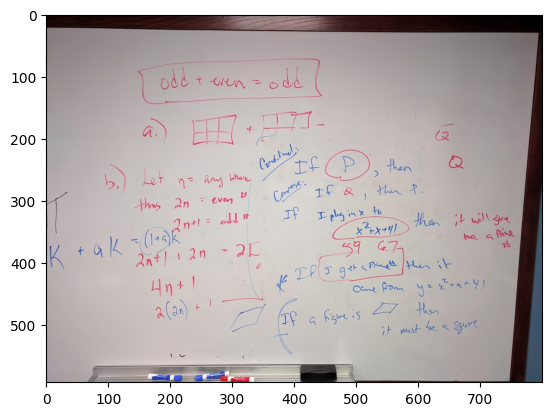

In [2]:
# load and display original image
board = iio.imread(uri="data/board.jpg")
board = np.array(board)
plt.imshow(board);

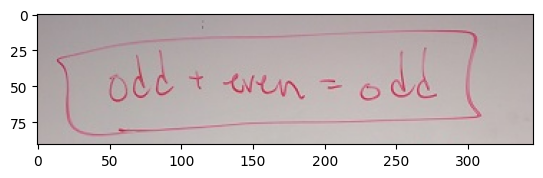

In [6]:
region = np.s_[60:151, 135:481, :]

clipped_board = board[region]

plt.imshow(clipped_board);

# Masking

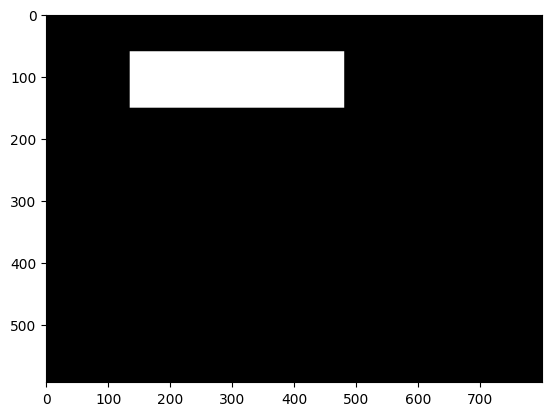

In [14]:
mask = np.zeros(board.shape[0:2], dtype=bool)
region = np.s_[60:151, 135:481]
mask[region] = 1
plt.imshow(mask, cmap="gray");

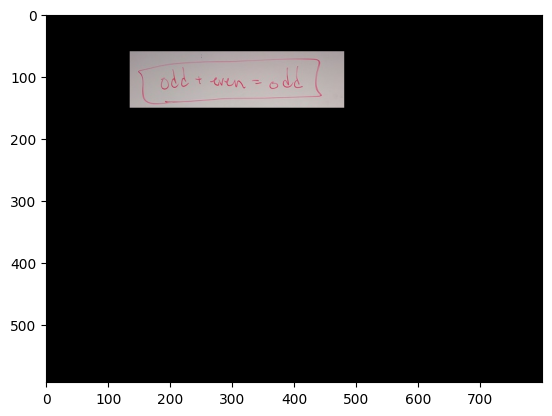

In [17]:
masked_board = board.copy()
masked_board[~mask] = 0
plt.imshow(masked_board);

# Drawing

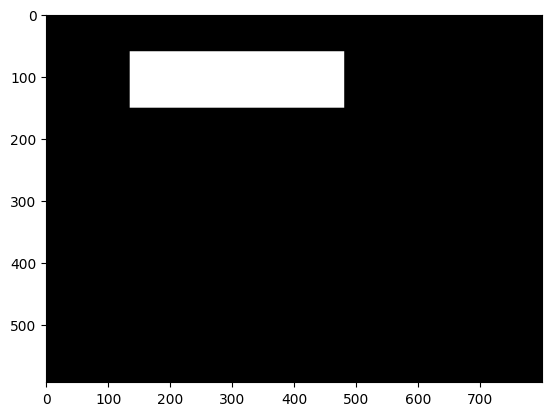

In [24]:
mask = np.zeros(board.shape[0:2], dtype=bool)

rr, cc = ski.draw.rectangle(start=(60,135), end=(150,480))
mask[rr, cc] = 1

plt.imshow(mask, cmap="gray");

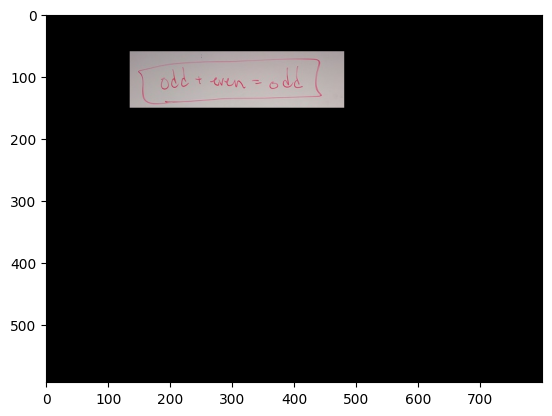

In [25]:
masked_board = board.copy()
masked_board[~mask] = 0
plt.imshow(masked_board);

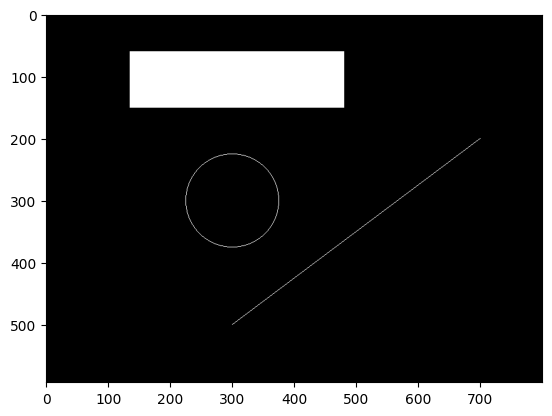

In [34]:
mask = np.zeros(board.shape[0:2], dtype=bool)

rr, cc = ski.draw.rectangle(start=(60,135), end=(150,480))
mask[rr, cc] = 1

rr, cc = ski.draw.circle_perimeter(r=300, c=300, radius=75)
mask[rr,cc] = 1

rr, cc = ski.draw.line(r0=500 , c0=300, r1=200, c1=700)
mask[rr,cc] = 1

plt.imshow(mask, cmap="gray");

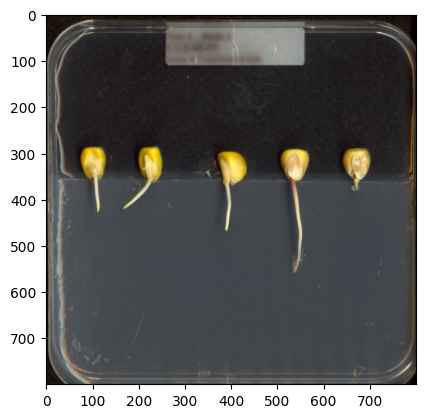

In [32]:
# Load and display the original image
maize_seedlings = iio.imread(uri="data/maize-seedlings.tif")
plt.imshow(maize_seedlings);

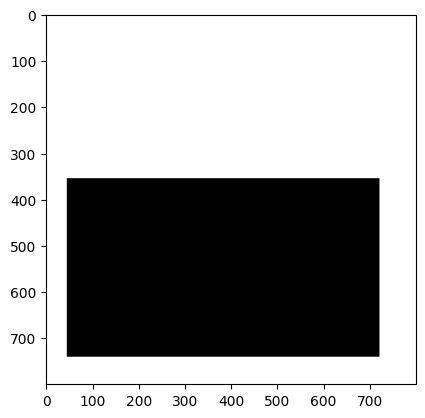

In [42]:
mask = np.ones(shape=maize_seedlings.shape[0:2], dtype=bool)
rr, cc = ski.draw.rectangle(start=(355,45), end=(740,720))
mask[rr, cc] = 0 # equivalent to False (think black)
plt.imshow(mask, cmap="gray");

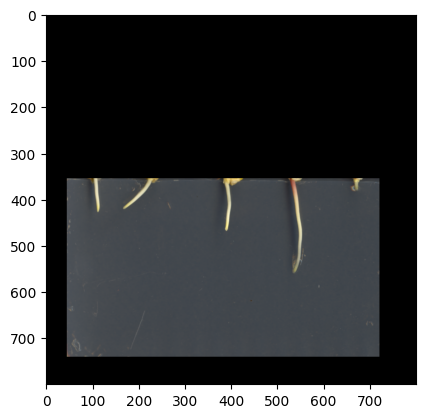

In [43]:
masked_maize = maize_seedlings.copy()
masked_maize[mask] = 0
plt.imshow(masked_maize);

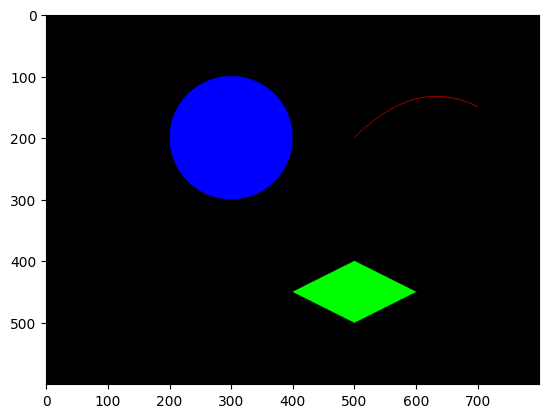

In [87]:
import mycolors

# create the black canvas
canvas = np.zeros(shape=(600, 800, 3), dtype="uint8")
rr, cc = ski.draw.disk(center=(200, 300), radius=100, shape=canvas.shape[0:2])
canvas[rr, cc] = blue

# example drawing a polygon
r = [400, 450, 500, 450, 400]
c = [500, 600, 500, 400, 500]
rr, cc = ski.draw.polygon(r,c)
canvas[rr, cc] = green

# example drawing a bezier curve
rr, cc = ski.draw.bezier_curve(r0=200, c0=500, r1=100, c1=600, r2=150, c2=700, weight=1)
canvas[rr, cc] = red

plt.imshow(canvas);

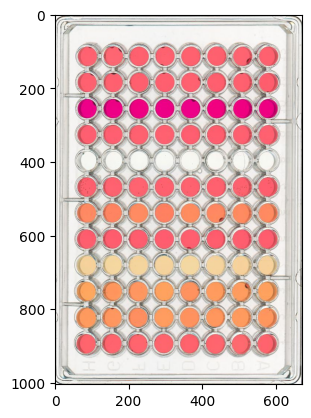

In [53]:
# Load the image
wellplate = iio.imread(uri="data/wellplate-01.jpg")
plt.imshow(wellplate);

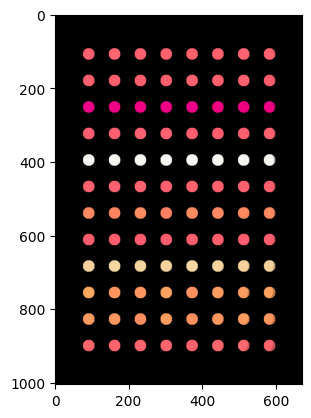

In [88]:
mask = np.ones(shape=wellplate.shape[0:2], dtype=bool)

# open and iterate through the centers file (included with image dataset)
with open("data/centers.txt", "r") as center_file:
    for line in center_file:
        coordinates = line.split()
        cx = int(coordinates[0])
        ry = int(coordinates[1])
        rr, cc = ski.draw.disk(center=(ry, cx), radius=16)
        mask[rr, cc] = 0

masked_wellplate = wellplate.copy()
masked_wellplate[mask] = 0
plt.imshow(masked_wellplate);

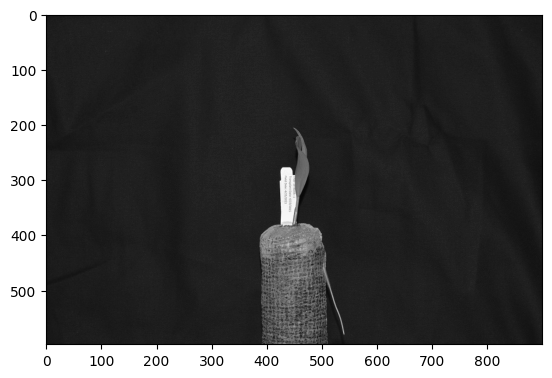

In [126]:
# read the image of a plant seedling as grayscale from the outset
plant_seedling = iio.imread(uri="data/plant-seedling.jpg", mode="L")
plt.imshow(plant_seedling, cmap="gray");

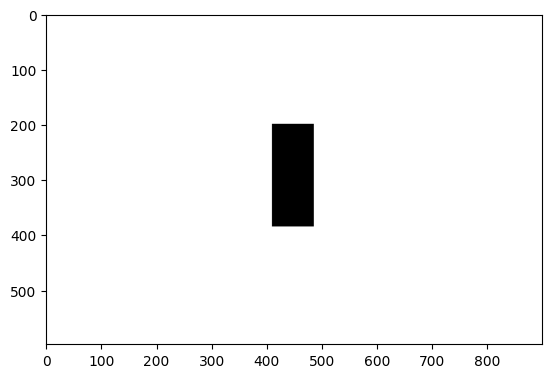

In [128]:
mask = np.ones(plant_seedling.shape, dtype=bool)
rr, cc = ski.draw.rectangle(start=(199, 410), end=(384, 485))
mask[rr, cc] = 0
plt.imshow(mask, cmap="gray");

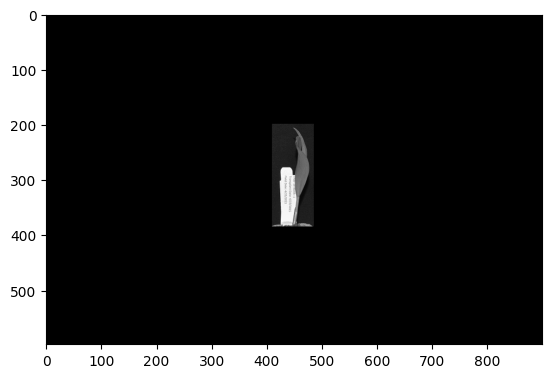

In [120]:
masked_seedling = plant_seedling.copy()
masked_seedling[mask] = 0
plt.imshow(masked_seedling, cmap="gray");

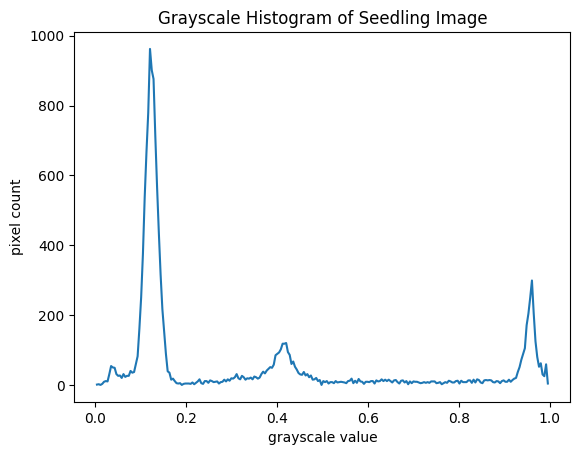

In [121]:
counts, bins = np.histogram(plant_seedling[~mask], bins=256)

plt.title("Grayscale Histogram of Seedling Image")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.plot(bins[:-1], counts);

In [111]:
# convert the image to float dtype with a value range from 0 to 1
plant_seedling = ski.util.img_as_float(plant_seedling)

In [112]:
# create the histogram
counts, bins = np.histogram(plant_seedling, bins=256)

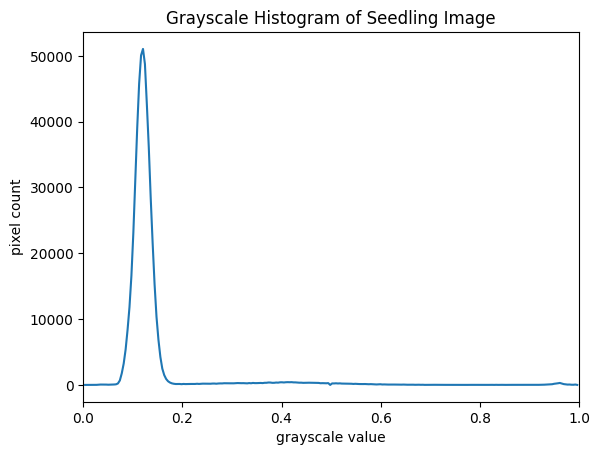

In [113]:
plt.title("Grayscale Histogram of Seedling Image")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
plt.plot(bins[:-1], counts);

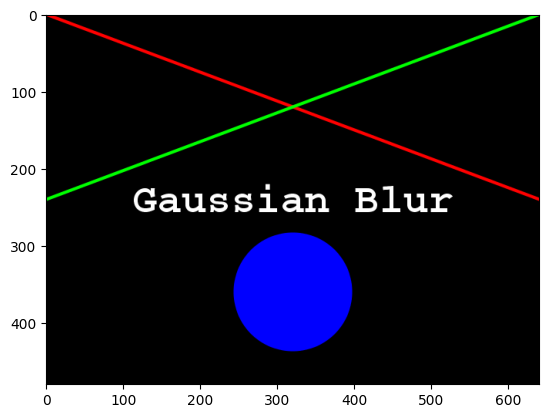

In [134]:
image = iio.imread(uri="data/gaussian-original.png")

# display the image
fig, ax = plt.subplots()
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


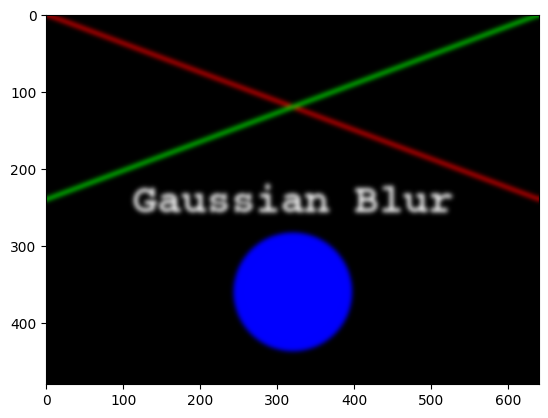

In [135]:
# apply Gaussian blur, creating a new image
image = ski.filters.gaussian(image, sigma=3.0, truncate=3.5, channel_axis=-1)
plt.imshow(image);

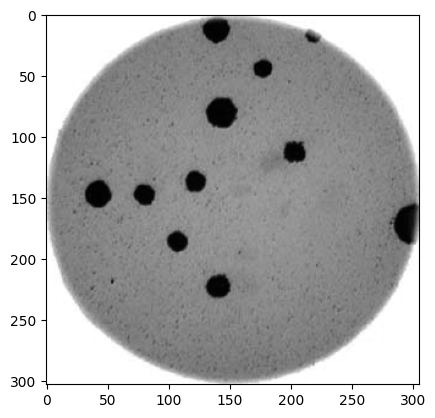

In [139]:
# read colonies color image and convert to grayscale
image = iio.imread('data/colonies-01.tif')
image_gray = ski.color.rgb2gray(image)

# define the pixels for which we want to view the intensity (profile)
xmin, xmax = (0, image_gray.shape[1])
Y = ymin = ymax = 150

# view the image indicating the profile pixels position
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray');
#ax.plot([xmin, xmax], [ymin, ymax], color='red');

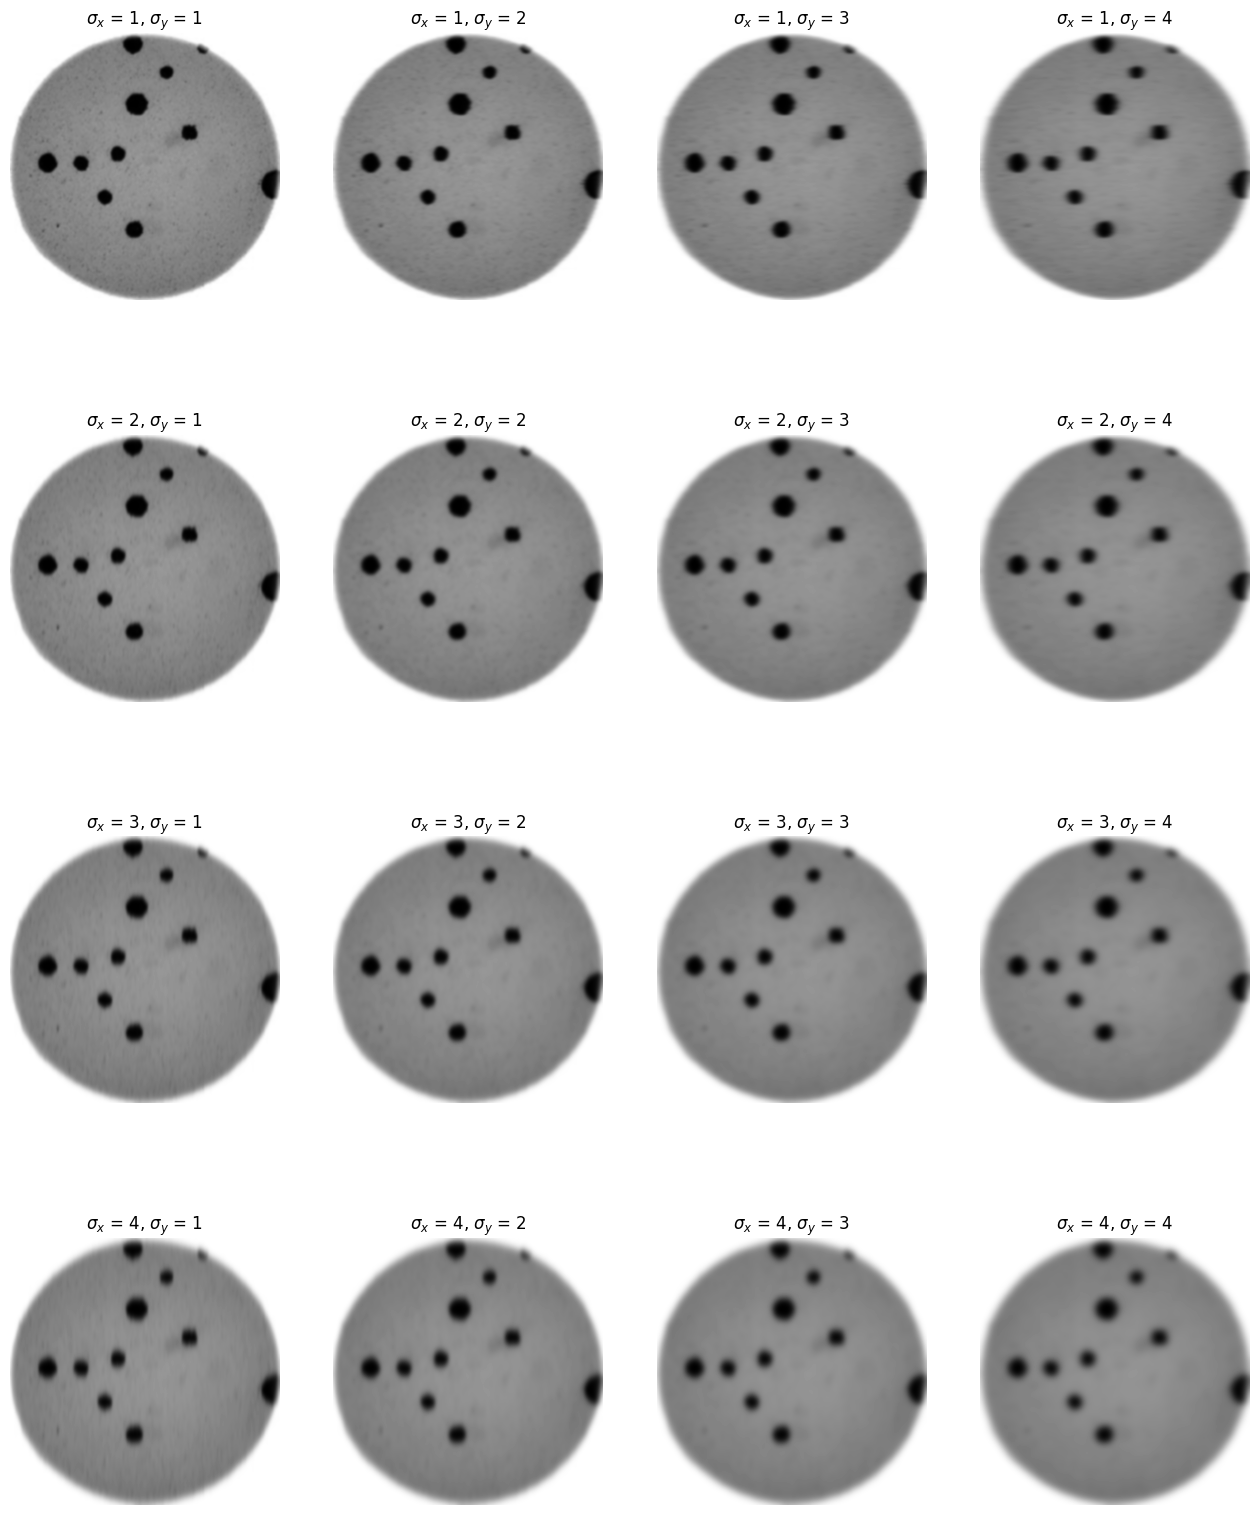

In [156]:
fix, ax = plt.subplots(4,4, figsize=(16,20))
sigmas = [1,2,3,4]
for i,sx in enumerate(sigmas):
    for j,sy in enumerate(sigmas):
        image_blur = ski.filters.gaussian(image_gray, sigma=(sx,sy))
        ax[i,j].imshow(image_blur, cmap="gray");
        ax[i,j].set_title(f"$\sigma_x$ = {sx}, $\sigma_y$ = {sy}")
        ax[i,j].set_axis_off()